In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("heart.csv")  
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

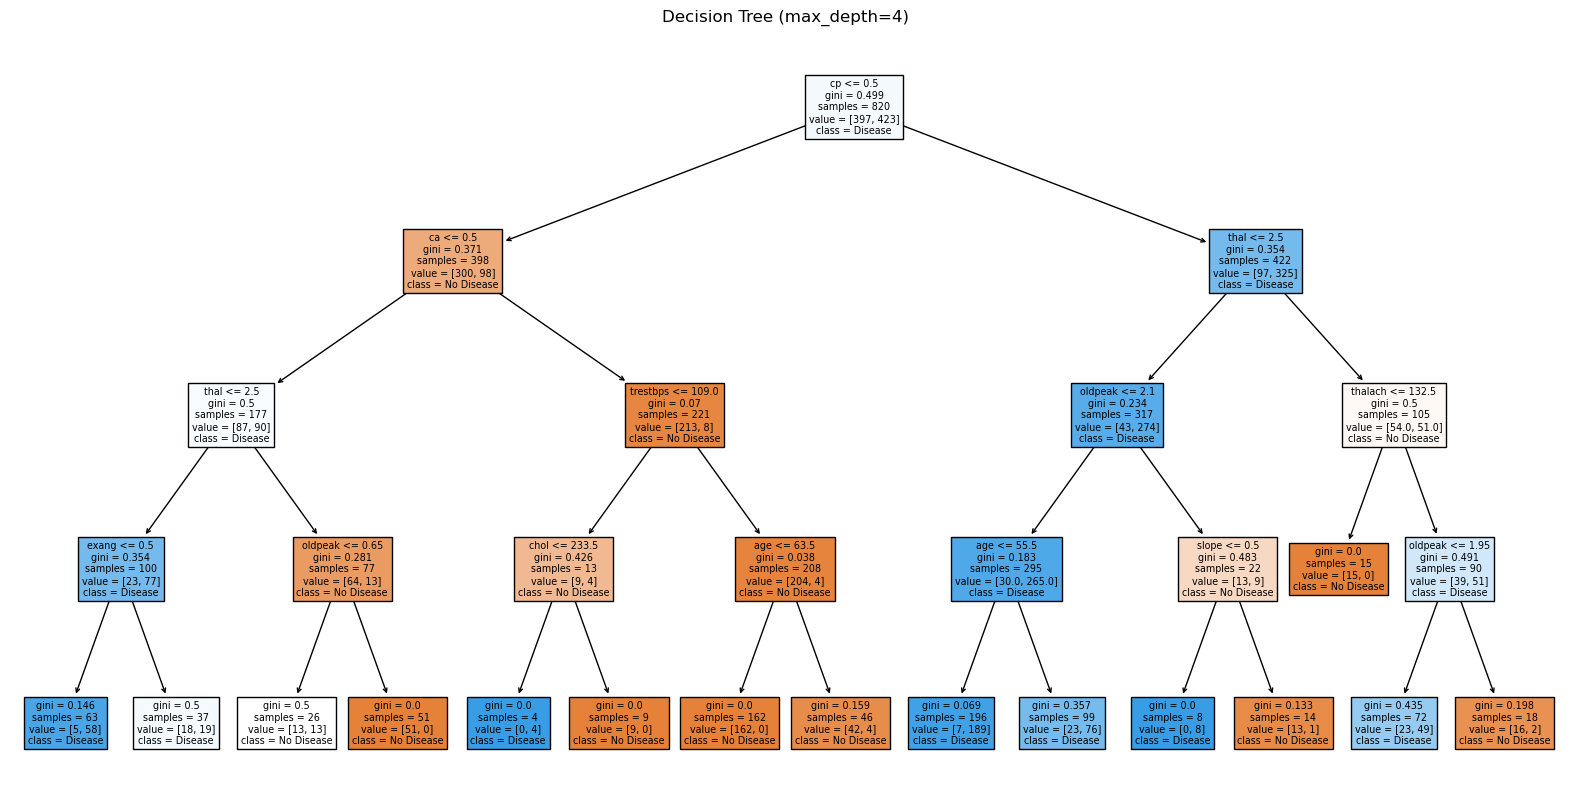

Decision Tree Accuracy: 0.8


In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree (max_depth=4)")
plt.show()
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

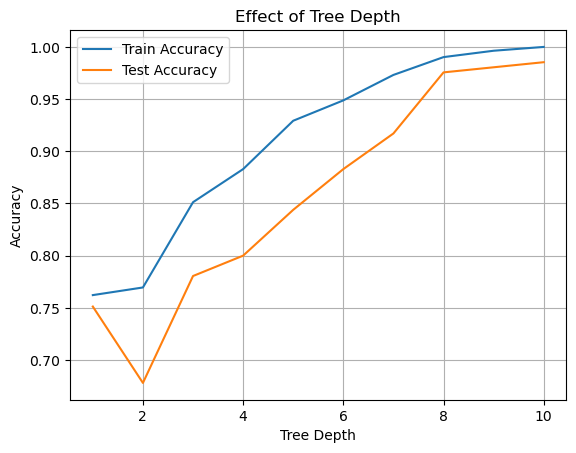

In [5]:
train_scores = []
test_scores = []
depth_range = range(1, 11)
for d in depth_range:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depth_range, train_scores, label="Train Accuracy")
plt.plot(depth_range, test_scores, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

Random Forest Accuracy: 0.9853658536585366


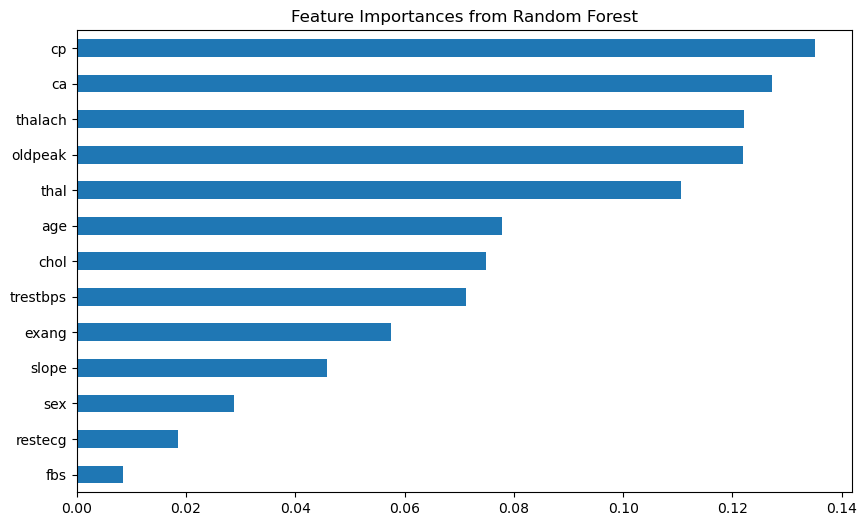

In [7]:
importances = pd.Series(forest.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.show()

In [8]:
cv_scores = cross_val_score(forest, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
